# Una consulta a Twitter

Hemos realizado dos consultas a Twitter y hemos almacenado los resultados en el fichero "trump.txt". Vamos a trabajar con este fichero a lo largo de este ejercicio. Así que lo primero es leer el fichero y cargarlo en una variable.

In [1]:
#Escribe el código necesario para leer el fichero "trump.txt" y almacenalo en una variable llamada consulta
f=open("trump.txt",'r')
consulta=f.read()
f.close()

In [2]:
#ejecuta la siguiente sentencias para ver el fichero
if consulta[0:100]=='{"search_metadata": {"count": 15, "completed_in": 0.061, "max_id_str": "910822593783062529", "since_':
    print "Felicidades fichero leído"

Felicidades fichero leído


Como vemos el formato del fichero es json así que debemos transformar la cadena consulta en json. Sin embargo, dentro del fichero como hemos comentado al principio hay dos consultas. Así que vamos a separar ambas consultas. Ayudate de la función split para transformar nuestra consulta en una lista con dos elemntos. Llama a la lista consultas.

In [3]:
consultas=consulta.split('---')

In [4]:
#Si todo ha ido bien debes tener dos elementos
if len(consultas)==2:
    print "Ya hemos dividido la consulta"

Ya hemos dividido la consulta


Bien, ahora nos encargaremos de transformar el texto JSON en un formato que podamos manejar con más comodidad. Vamos a empezar por la primera consulta. Para ello utiliza la biblioteca JSON vista en el curso. Almacenaremos el resultado en las variables consulta1 y consulta2

In [5]:
import json
#transforma consultas en objetos de Python
consulta1=json.loads(consultas[0])
consulta2=json.loads(consultas[1])

Una vez que tenemos las consultas en formato JSON, existe un elemento llamado "search_metadata" que contiene información relacionada con la consulta como por ejemplo el tiempo que ha tardado en hacerse al consulta o la fecha. Dentro de ese elemento existe un subelemento llamado "query" que contiene la cadena con la que hemos realizado la búsqueda. Muestra las consultas realizadas con una instrucción print.

In [6]:
#Vamos a ver la información de 
print "La primera consulta ha sido sobre el término {0} y la segunda consulta sobre el término {1}".format(consulta1['search_metadata']['query'],consulta2['search_metadata']['query']) 

La primera consulta ha sido sobre el término Trump y la segunda consulta sobre el término %40POTUS


In [7]:
print "En la primera consulta tenemos {0} tweets".format(len(consulta1['statuses']))
print "En la segunda consulta tenemos {0} tweets".format(len(consulta2['statuses']))

En la primera consulta tenemos 15 tweets
En la segunda consulta tenemos 14 tweets


Vamos a echarle un vistazo a la informacion contenida en un tweet:

In [8]:
print json.dumps(consulta1['statuses'][0],indent=4)

{
    "contributors": null, 
    "truncated": false, 
    "text": "Aux Nations-Unies, Donald Trump vient de prononcer un violent discours de guerre. Il s\u2019est dit pr\u00eat \u00e0 \u00ab d\u00e9truire... https://t.co/2X35rkAAZE", 
    "is_quote_status": false, 
    "in_reply_to_status_id": null, 
    "id": 910822593783062529, 
    "favorite_count": 0, 
    "source": "<a href=\"http://www.facebook.com/twitter\" rel=\"nofollow\">Facebook</a>", 
    "retweeted": false, 
    "coordinates": null, 
    "entities": {
        "symbols": [], 
        "user_mentions": [], 
        "hashtags": [], 
        "urls": [
            {
                "url": "https://t.co/2X35rkAAZE", 
                "indices": [
                    116, 
                    139
                ], 
                "expanded_url": "http://fb.me/1dQjaNxPz", 
                "display_url": "fb.me/1dQjaNxPz"
            }
        ]
    }, 
    "in_reply_to_screen_name": null, 
    "id_str": "910822593783062529", 
    

Como es bastante incómodo trabajar con dos listas, una para cada consulta vamos a unir los tweets de ambas consultas en una únicar lista llamada tweets. ¿Cómo lo harías?

In [9]:
tweets=consulta1['statuses']+consulta2['statuses']
print len(tweets)

29


## Análisis de usuarios (Sesión I)

Dentro de la estructura tenemos un campo interesante "user". Este elemento es una descripción del usuario que ha enviado el tweet en el momento en el que el tweet fue publicado. Tenemos la siguiente información relevante:
- id: que es un long con el identificador del usuario.
- name: es el nombre que se muestra en el perfil de twitter.
- screen_name : es el nombre de la cuenta, es decir lo que generalmente va seguido de la @.
- profile_image_url_https : es una URL a la imagen del pérfil del usuario en twitter.
- statuses_count : es el número de tweets que ha publicado el usuario.
- followers_count : es el número de seguidores que tiene el usuario.
- friends_count : número de amigos del usuario.
- created_at : fecha en la que se creo la cuenta.
- lang : idioma en el que tiene configurada la cuenta de twitter.
- location : lugar donde el usuario dice que es

Un fichero CSV es un fichero tabulado donde organizamos la información en fichas y columnas de forma similar a una tabla. Cada línea del fichero es un registro y cada campo está delimitado por un caracter delimitador, como por ejemplo el punto y coma o la coma simple.

Queremos crear un fichero CSV para almacenar la información de los usuarios. Para ello la estructura será:

id ; name ; screen_name; profile_image; statuses ; followers; friends ; created_at ; lang ; location

Recorre todos los tweets de las consultas y captura para cada usuario la información relevante que hemos mencionado anteriormente. Luego dale formato de línea para un fichero CSV y almacenalo en un fichero que llamaremos usarios .csv.

Por ejemplo, para el tweet que hemos visto en la celda anterior la línea sería:

271867386;Herr Mobio;mabogust59;https://pbs.twimg.com/profile_images/2387730001/96rs9r9bjpg0g98sldbe_normal.jpeg;2141;39;73;Fri Mar 25 10:16:34 +0000 2011;fr;Songon Agban

In [10]:
def format_user_twitter(user):
        linea="{0};{1};{2};{3};{4};{5};{6};{7};{8};{9}\n".format(user['id'],
                                       user['name'].encode('utf-8'),
                                       user['screen_name'].encode('utf-8'),
                                       user['profile_image_url_https'],
                                       user['statuses_count'],
                                       user['followers_count'],
                                       user['friends_count'],
                                       user['created_at'],
                                       user['lang'],
                                       user['location'])
        return linea
f=open("usuarios.csv","w")
f.write('id ; name ; screen_name; profile_image; statuses ; followers; friends ; created_at ; lang ; location\n')
for t in tweets:
    user=t['user']
    f.write(format_user_twitter(user))
f.close()

Una vez creada la tabla está bien para almacenar la información y trabajar con herramientas externas, pero no nos permite trabajar mucho con ella dentro de Python. Un modo más cómodo de trabajar sería si pudieramos crear una tabla que nos pemitierá acceder a los datos.

Vamos a utilizar un diccionario para crear un hashmap. Crearemos tantos elementos como "columnas" habría en nuestra tabla y usaremos los nombres de las columnas como claves. Como valor crearemos una lista con los 29 valores de cada registro. De manera que si quisieramos saber el screen_name del segundo usuario de nuestra tabla haríamos:

`usuarios['screen_name'][2]`

como en una tabla.

Crea este diccionario y llámalo usuarios.

In [11]:
usuarios={  'id' : [t['user']['id'] for t in tweets ],
            'screen_name' : [t['user']['screen_name'] for t in tweets ],
            'profile_image' : [t['user']['screen_name'] for t in tweets ],
            'statuses' : [t['user']['statuses_count'] for t in tweets ],
            'followers' : [t['user']['followers_count'] for t in tweets ],
            'friends' : [t['user']['friends_count'] for t in tweets ],
            'created_at' : [t['user']['created_at'] for t in tweets ],
            'lang' : [t['user']['lang'] for t in tweets ],
            'location': [t['user']['location'] for t in tweets ]}

u'marbro14'

In [ ]:
usuarios['screen_name'][2]

Vamos a crear una función que nos va a ayudar un poco. Esta función debe devolvernos el máximo en una lista, tanto el valor máximo como la posición de ese máximo en la lista. Llama a esta función maximo. 

In [22]:
def maximo(l):
    maximo=l[0]
    for i in l:
        if i> maximo:
            maximo=i
    return maximo, l.index(maximo)

Vamos a conocer un poco mejor a los usuarios: ¿quién tiene más seguidores?¿quién ha publicado más tweets?¿quién tiene más tweets?. Usa la función maximo y la estructura para descubrirlo.

In [24]:
max_followers,pos_fol=maximo(usuarios['followers'])
print "El usuario con más seguidores es {0}, con {1} followers".format(usuarios['screen_name'][pos_fol],max_followers)
max_friends,pos_fr=maximo(usuarios['friends'])
print "El usuario con más amigos es {0}, con {1} amigos".format(usuarios['screen_name'][pos_fr],max_friends)
max_status,pos_st=maximo(usuarios['statuses'])
print "El usuario con más tweet ses {0}, con {1} tweets publicados".format(usuarios['screen_name'][pos_st],max_status)


El usuario con más seguidores es JudyMcGuffey, con 4220 followers
El usuario con más amigos es JudyMcGuffey, con 3557 amigos
El usuario con más tweet ses KillingJokez, con 162702 tweets publicados


Igual que hemos realizado la función de maximo, define la función de mínimo y comprueba quienes son los que tiene menos amigos, seguidores y publicaciones.

In [69]:
def minimo(l):
    minimo=l[0]
    for i in l:
        if i<minimo:
            minimo=i
    return minimo, l.index(minimo)

Vamo a aprovechar una de las principales ventajas de python para comprobar tus resultados. Sólo tienes que ejecutar la siguiente celda para ver un gráfico con los datos de los usuarios

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D0C00B8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D3306D8>], dtype=object)

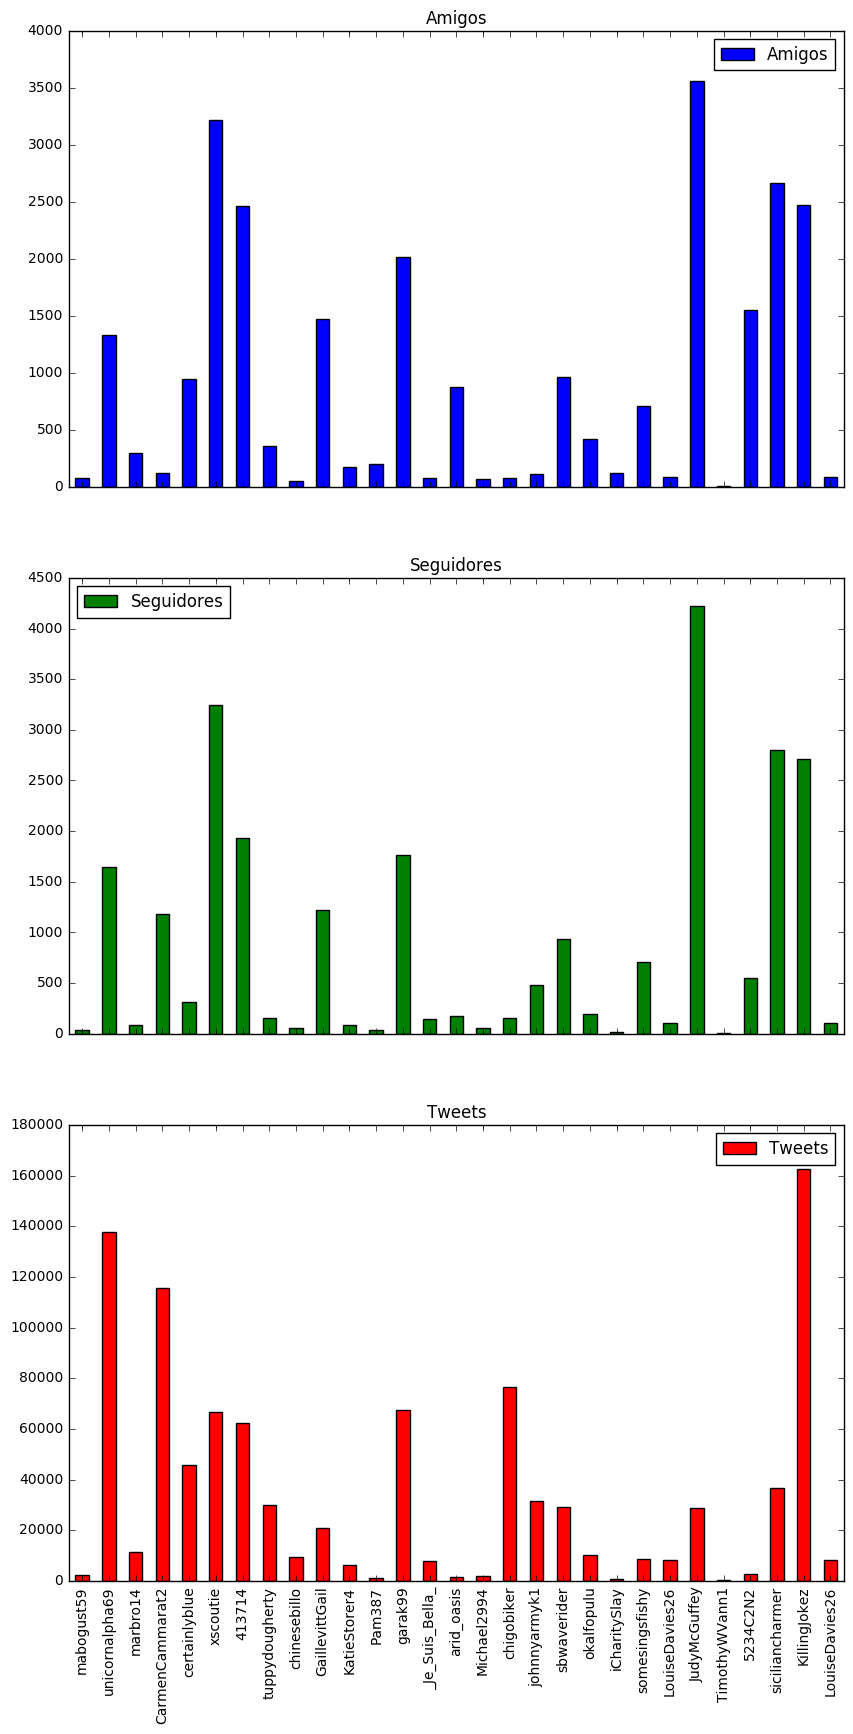

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline  

df=pd.DataFrame({'Seguidores':usuarios['followers'],'Amigos':usuarios['friends'],'Tweets':usuarios['statuses']},index=usuarios['screen_name'])
df.plot(kind='bar',subplots=True, figsize=(10,20))

Otro campo interesante es el campo de fecha. ¿Quién lleva más tiempo en Twitter y quién menos?. Lo primero para operar con fechas es que debemos transformar la lista de fechas con objetos DateTime. Crea una función que lo cambie y aplicaselo al array.

In [63]:
import datetime
usuarios['created_at']=map(lambda x: datetime.datetime.strptime(x,"%a %b %d %H:%M:%S +0000 %Y") ,usuarios['created_at'])

In [66]:
#si lo hemos hecho correctamente el tipo de cada elementos es una fecha
print usuarios['created_at'][0], type(usuarios['created_at'][0])

2011-03-25 10:16:34 <type 'datetime.datetime'>


¿Si usamos máximo nos devolverá el usuario que lleva más tiempo en Twitter?¿O nos lo dará minimo?. ¡Compruebalo!

In [70]:
max_tiempo,pos=maximo(usuarios['created_at'])
print max_tiempo, usuarios['screen_name'][pos]
min_tiempo,pos_m=minimo(usuarios['created_at'])
print min_tiempo, usuarios['screen_name'][pos_m]

2017-08-15 19:10:50 TimothyWVann1
2008-08-29 21:28:11 garak99


Por último, hemos visto que existe un campo lang, que indica la el idioma. ¿Cuántos idiomas distintos hemos visto?¿Cuántos usuarios distintos tenemos por cada idioma?. Crear una lista de tuplas, donde cada tupla sea un idioma y el correspondiente número de usuarios. Llama a esta lista lista_idiomas.

In [73]:
idiomas={}
for i in usuarios['lang']:
    if idiomas.has_key(i):
        idiomas[i]=idiomas[i]+1
    else:
        idiomas[i]=1
        
lista_idiomas=[(k,idiomas[k]) for k in idiomas.keys()]


[(u'fr', 1), (u'en', 27), (u'nl', 1)]


In [74]:
print lista_idiomas

[(u'fr', 1), (u'en', 27), (u'nl', 1)]
